In [1]:
### Importing the required libraries
# Pandas for analysing the csv
import pandas as pd

# Matplotlib and seaborn for ploting it
import matplotlib.pyplot as plt
import seaborn as sns

# For taking care of warnings
import warnings
warnings.filterwarnings('ignore')

# For train-test-split
import sklearn
from sklearn.model_selection import train_test_split

# For Feture Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# For training the model
import statsmodels.api as sm

# For calculating the variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For evaluating r2 for test data
from sklearn.metrics import r2_score

### Exploratory Data Analysis

In [2]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
## Validating if any null value is present
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [6]:
# Extracting Day_of_Month from the dteday column entry
df['day_of_month']=pd.DatetimeIndex(df['dteday']).day
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_month
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1


In [7]:
# Dropping the dteday column as we already have day,mnth and yr columns
# Dropping the instant column too, as it will not be of any use
# Dropping the registered and casual columns as it is directly related to our target variable cnt
df=df.drop(['dteday','instant','registered','casual'],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_of_month
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1


In [8]:
df.shape

(730, 13)

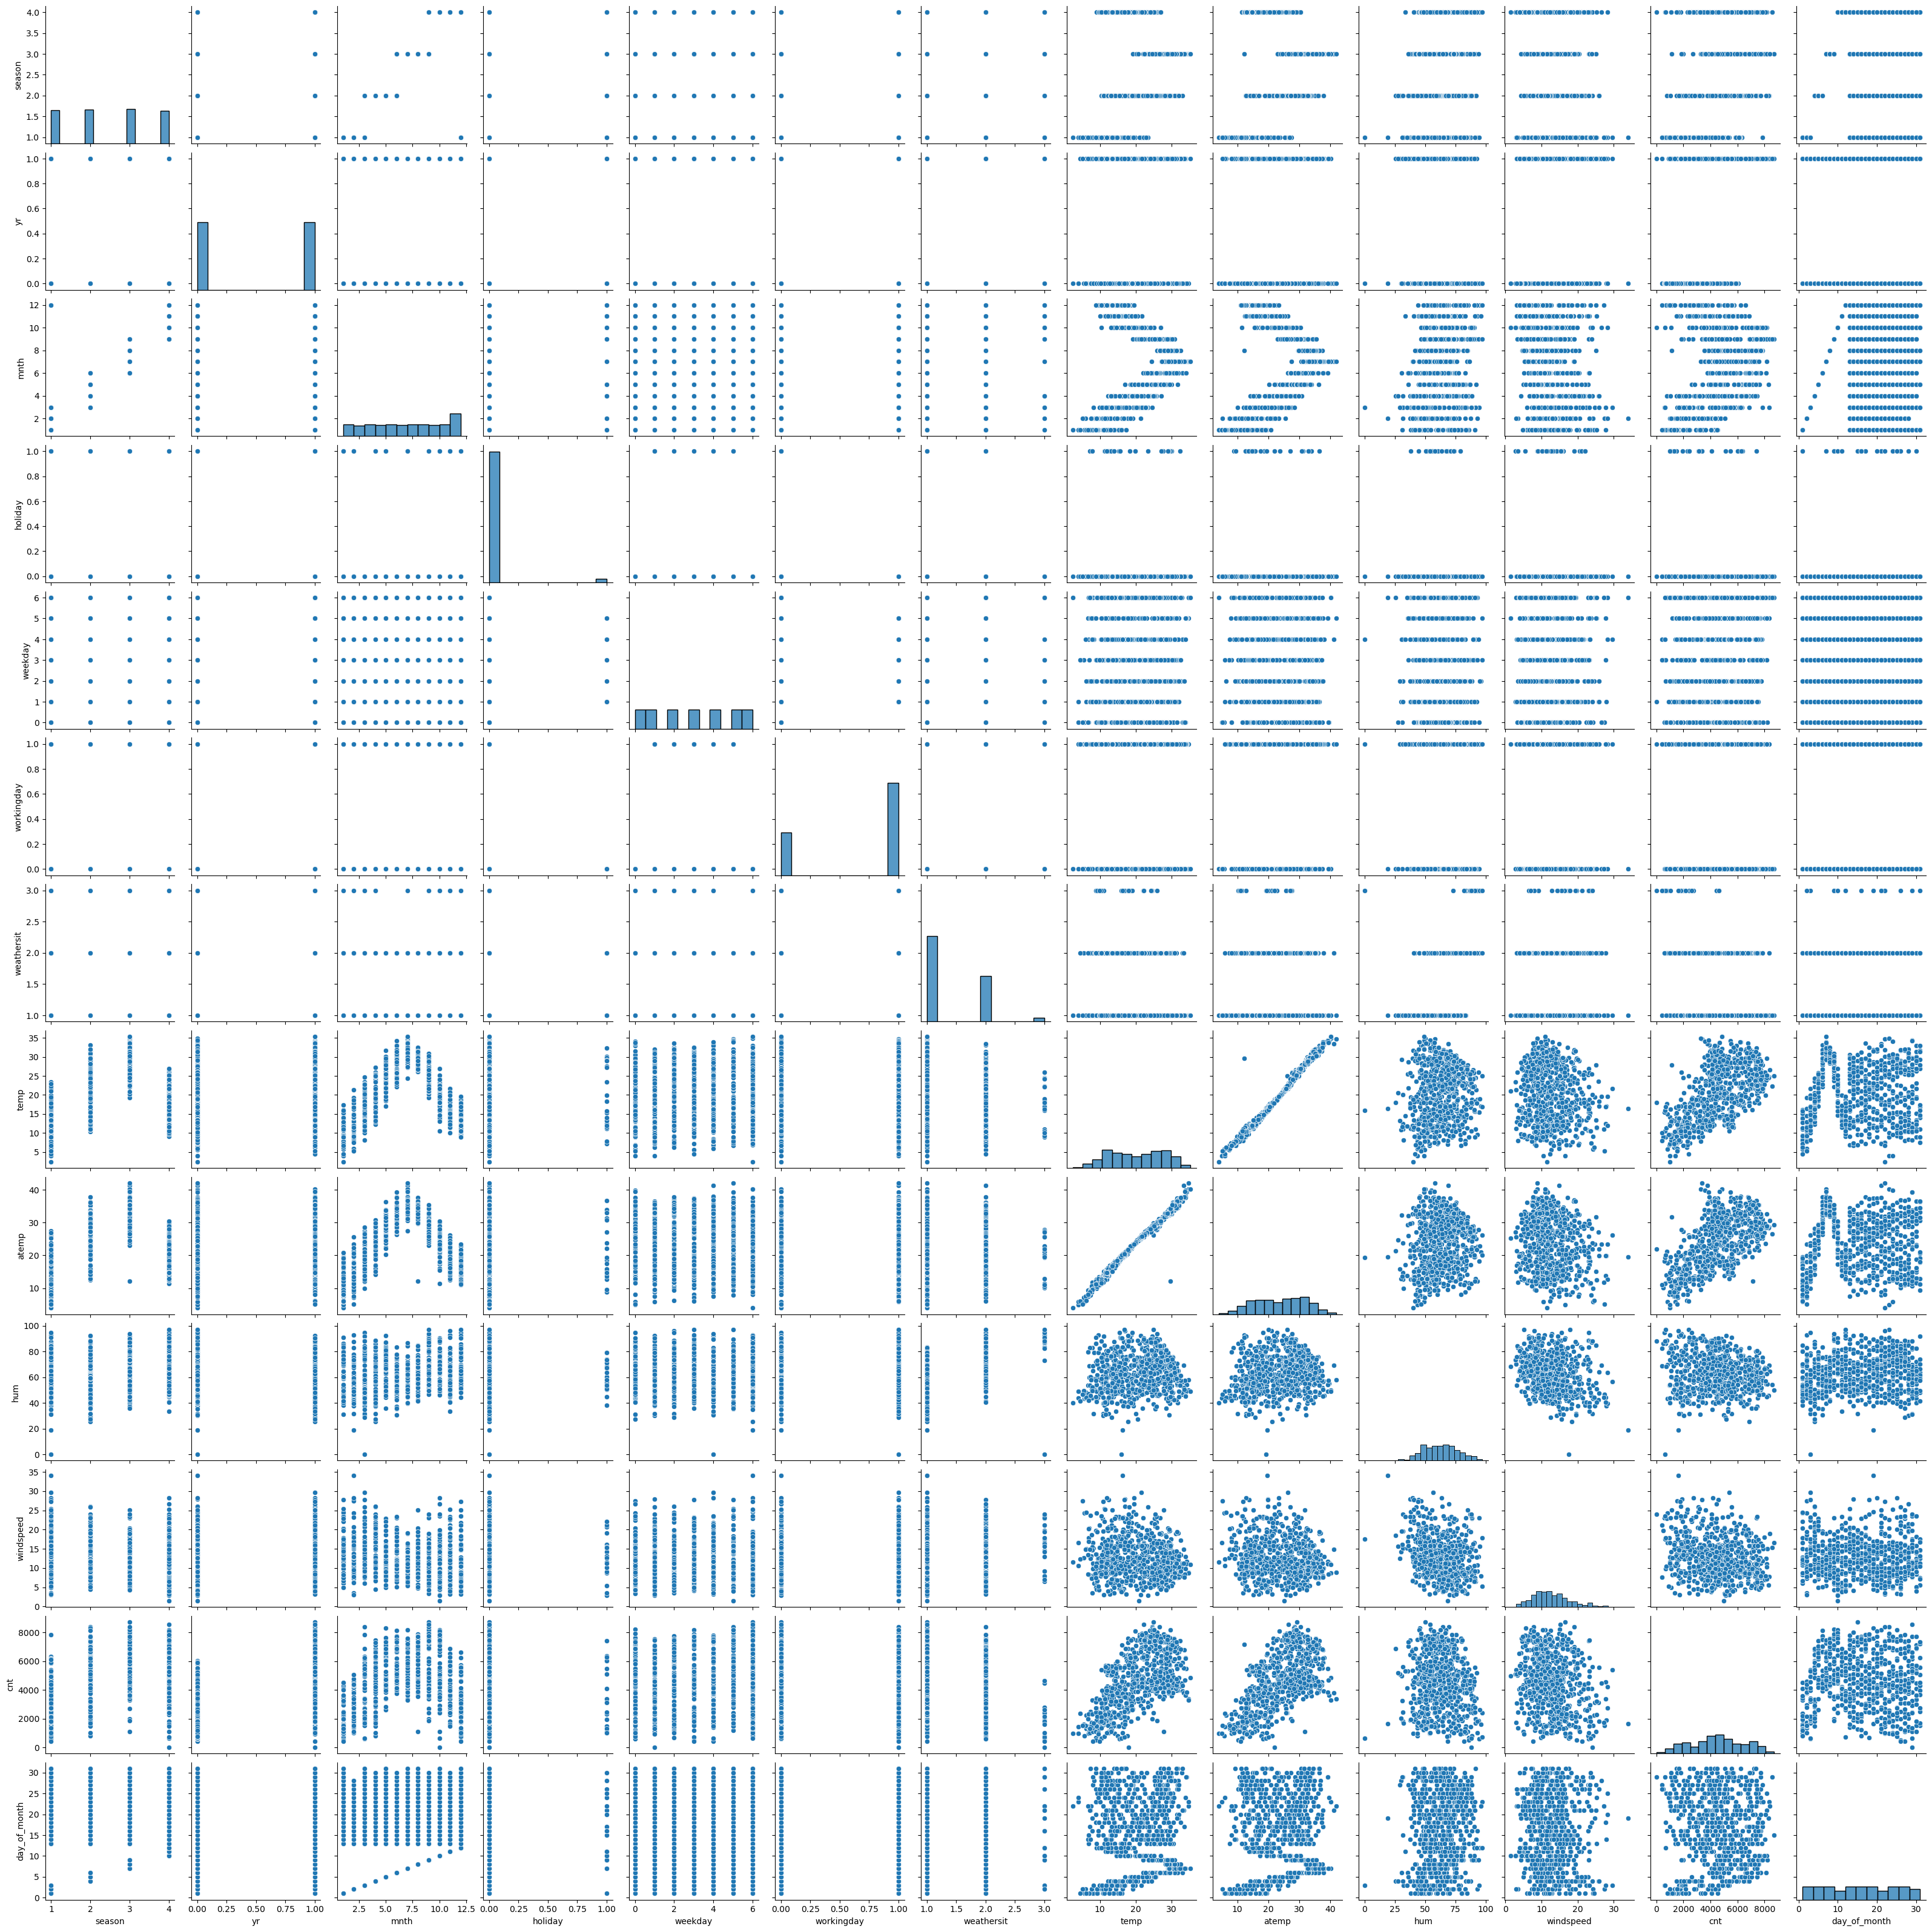

In [9]:
#visualizing the pairplot of all columns
sns.pairplot(data=df)

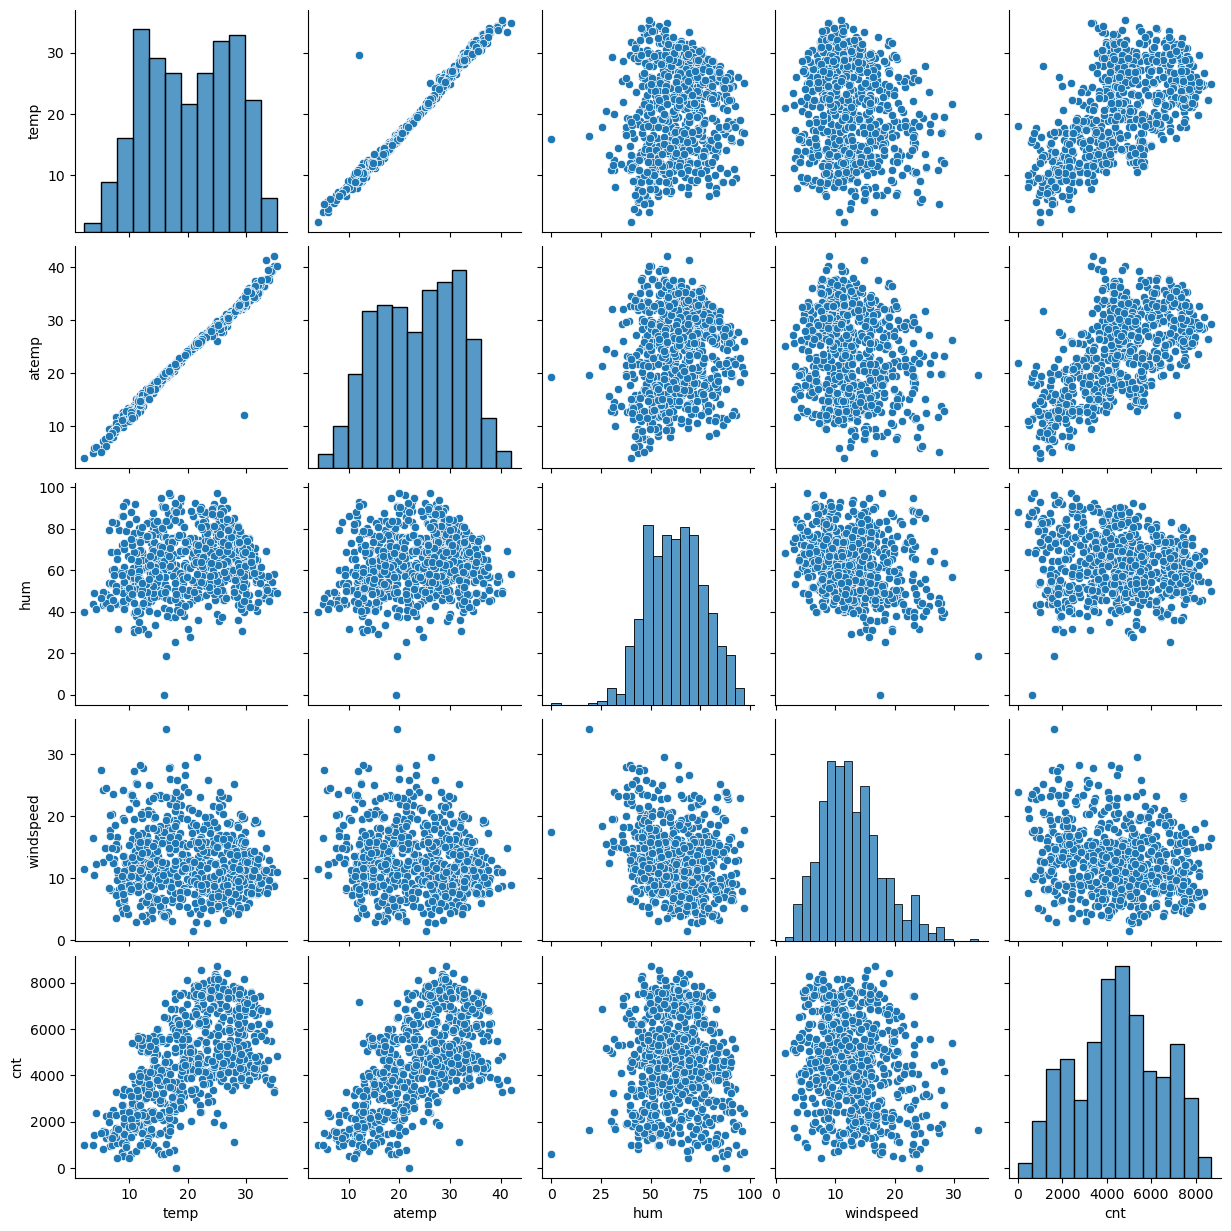

In [10]:
#visualizing the pairplot of numeric columns
sns.pairplot(data=df[['temp','atemp','hum','windspeed','cnt']])

In [11]:
# Working on categorizing the columns as per their type: continuous(cont), categorical(cat) and target
# First getting the unqiue values per columns
df.nunique()

season            4
yr                2
mnth             12
holiday           2
weekday           7
workingday        2
weathersit        3
temp            498
atemp           689
hum             594
windspeed       649
cnt             695
day_of_month     31
dtype: int64

In [12]:
# Binning them
cat_col=['season','yr','mnth','holiday','weekday','workingday','weathersit','day_of_month']
cont_col=['temp','atemp','hum','windspeed']
target_col=['cnt']

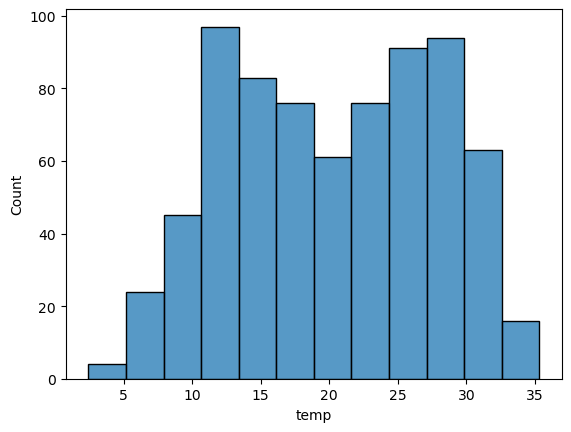

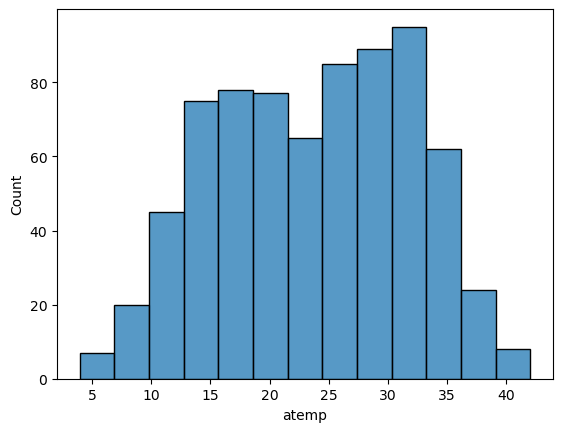

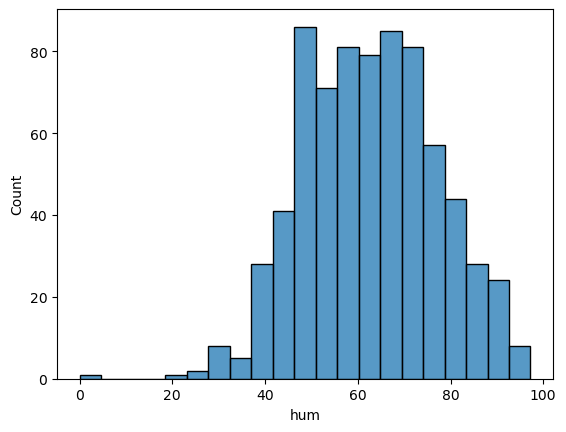

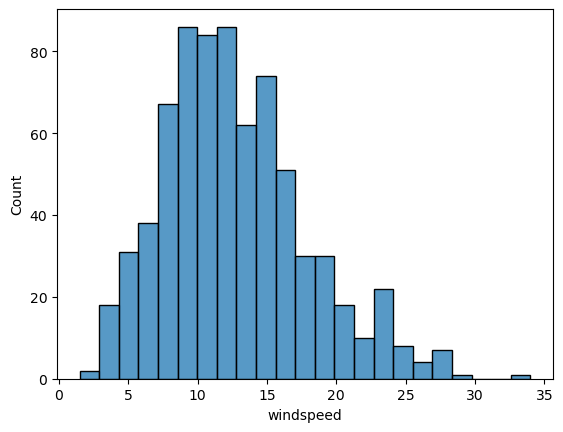

In [13]:
# Using For loop we would be plotting the continuous columns
for i in cont_col:
    sns.histplot(x=df[i])
    plt.show()

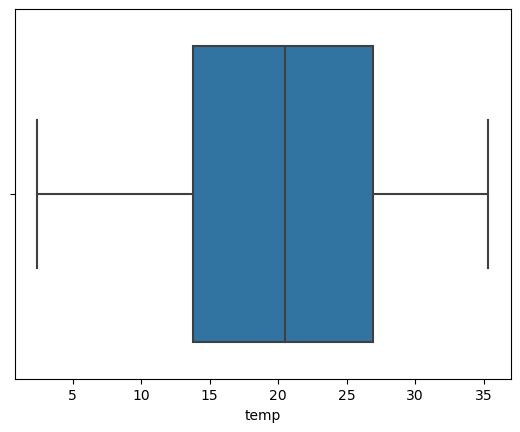

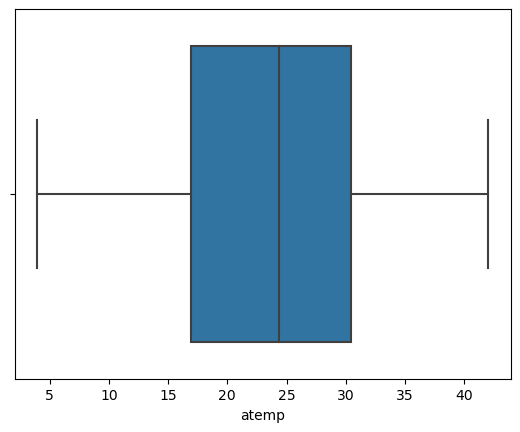

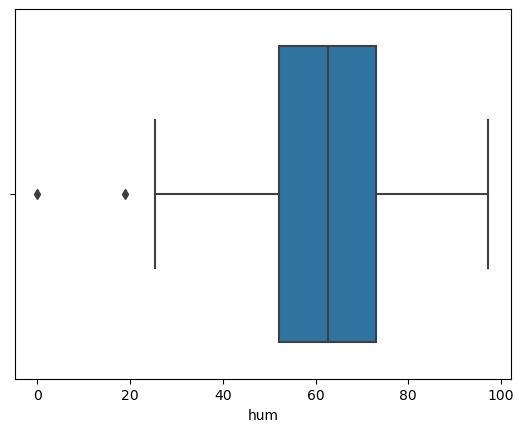

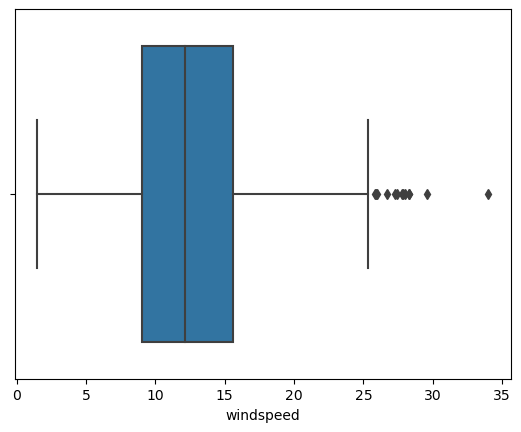

In [14]:
# Checking the spread using boxplot
for i in cont_col:
    sns.boxplot(x=df[i])
    plt.show()

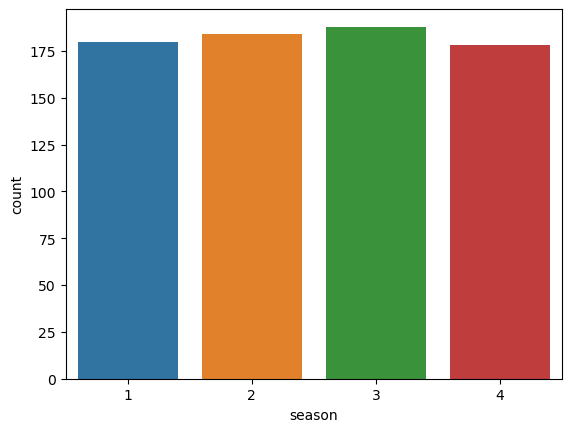

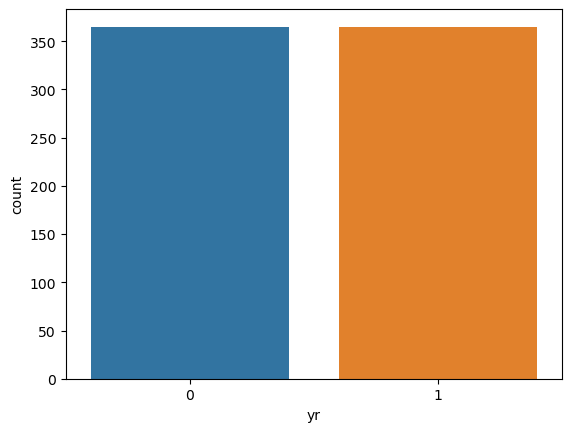

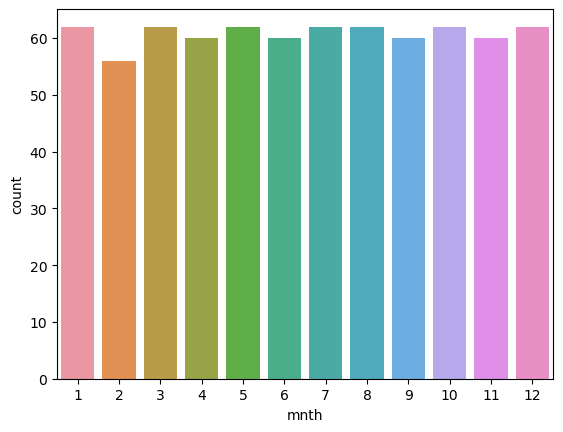

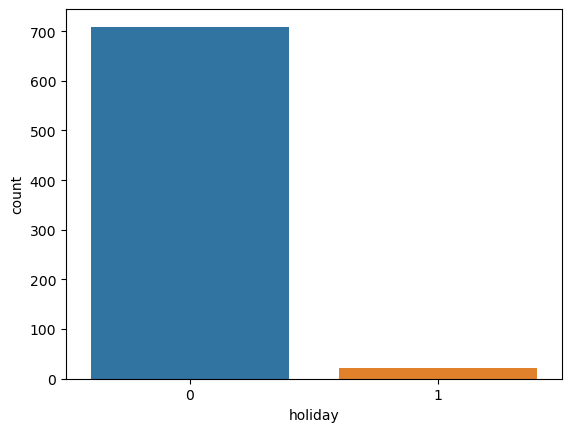

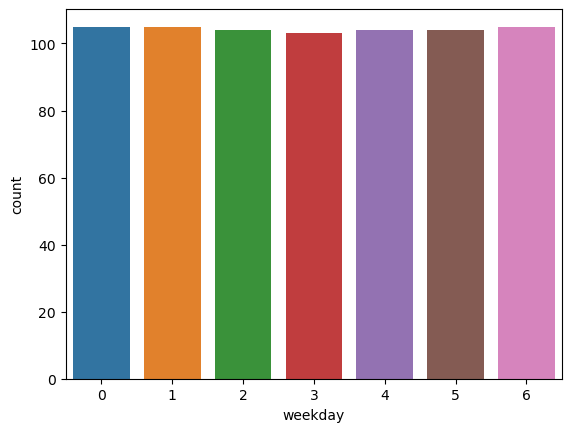

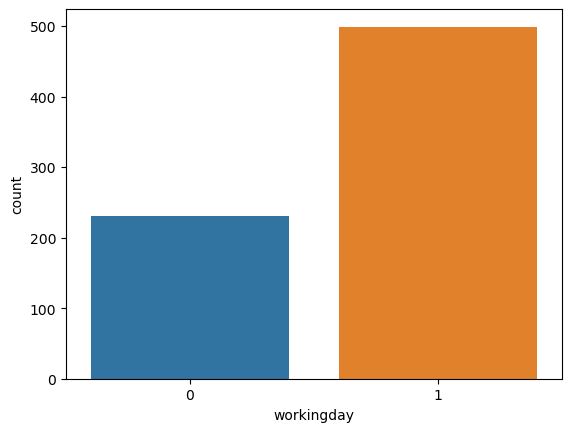

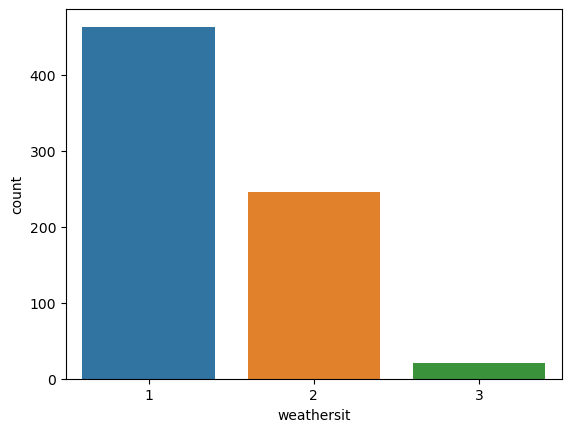

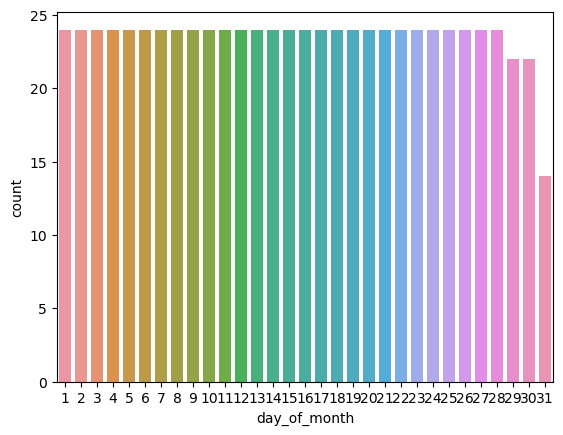

In [15]:
# Plot for categorical variable
for i in cat_col:
    sns.countplot(x=df[i])
    plt.show()

### Bivariate Analysis

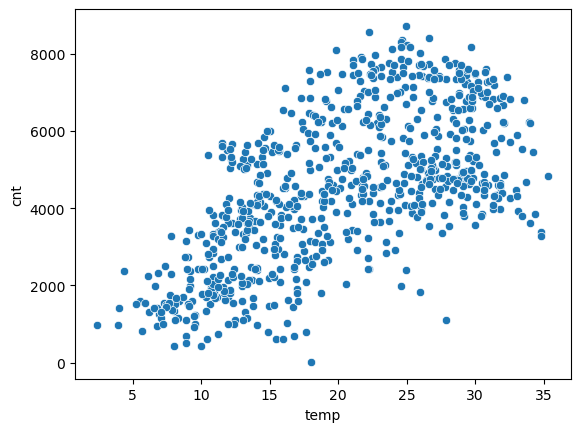

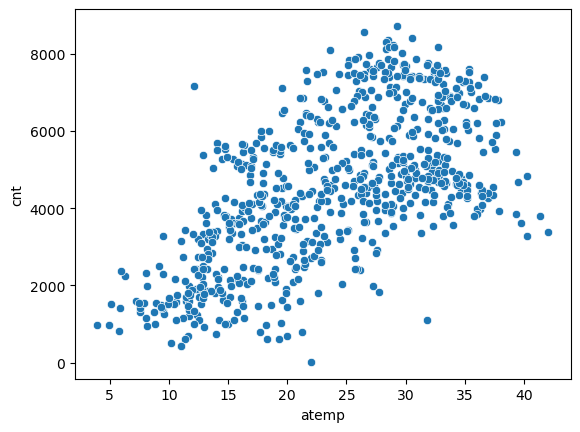

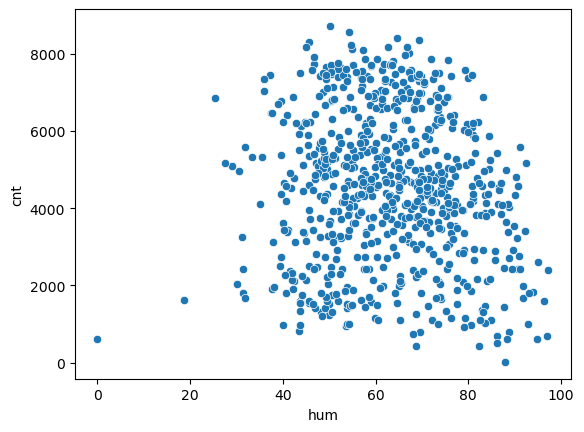

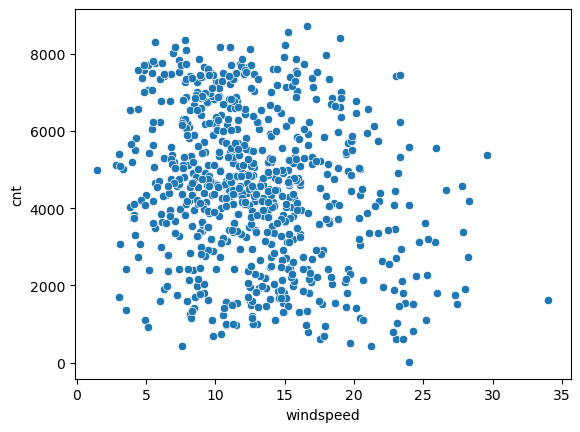

In [15]:
for i in cont_col:
    sns.scatterplot(x=df[i],y=df['cnt'])
    plt.show()

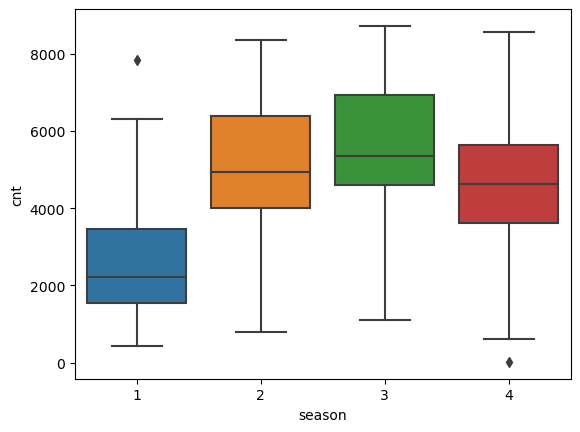

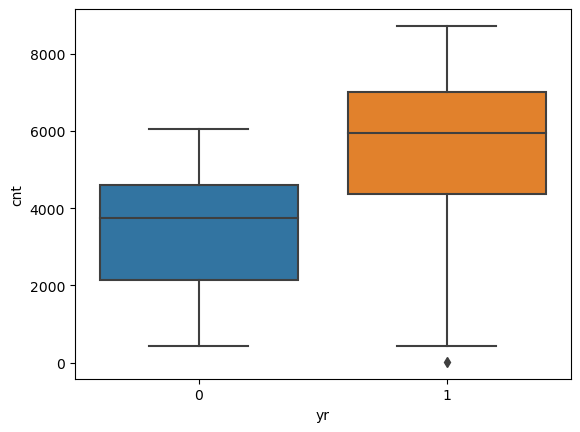

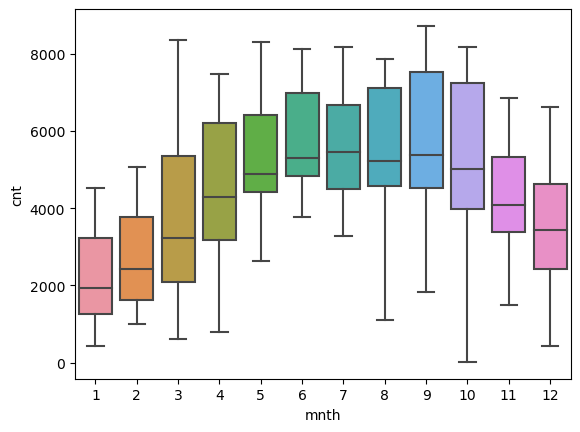

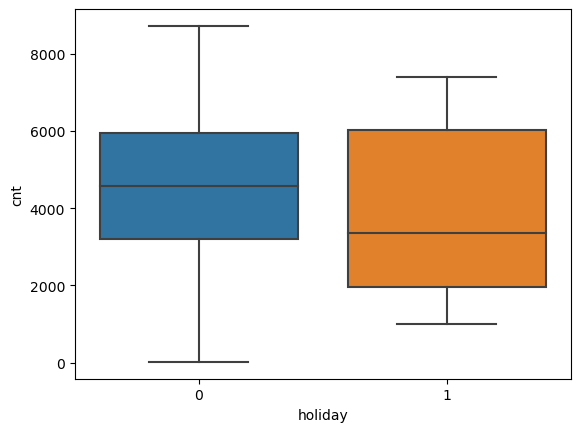

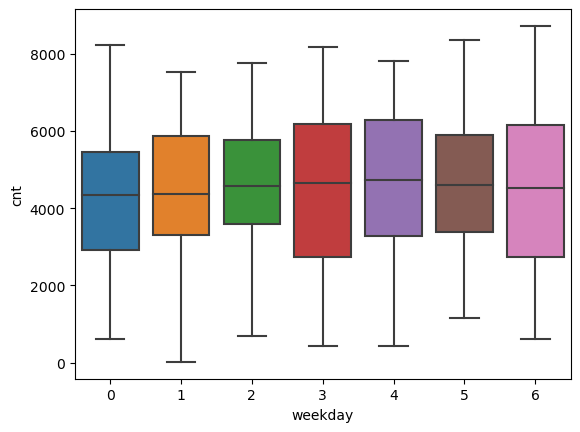

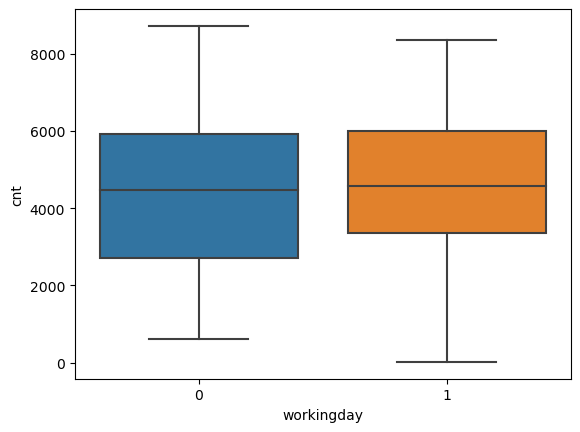

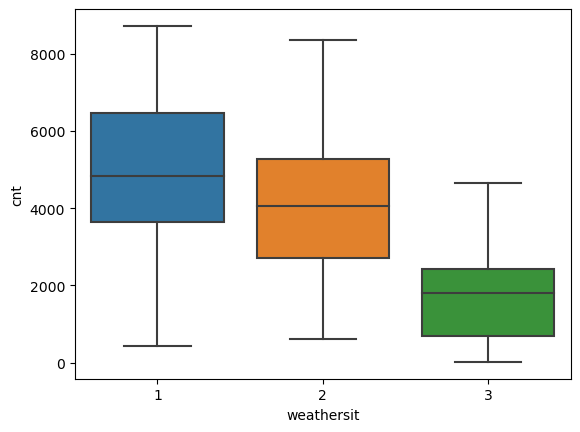

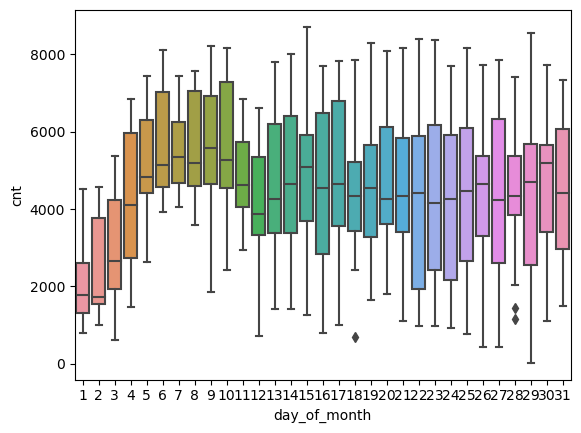

In [16]:
# Checking the spread as compared to target variable
for i in cat_col:
    sns.boxplot(x=df[i],y=df['cnt'])
    plt.show()

<Axes: xlabel='day_of_month', ylabel='cnt'>

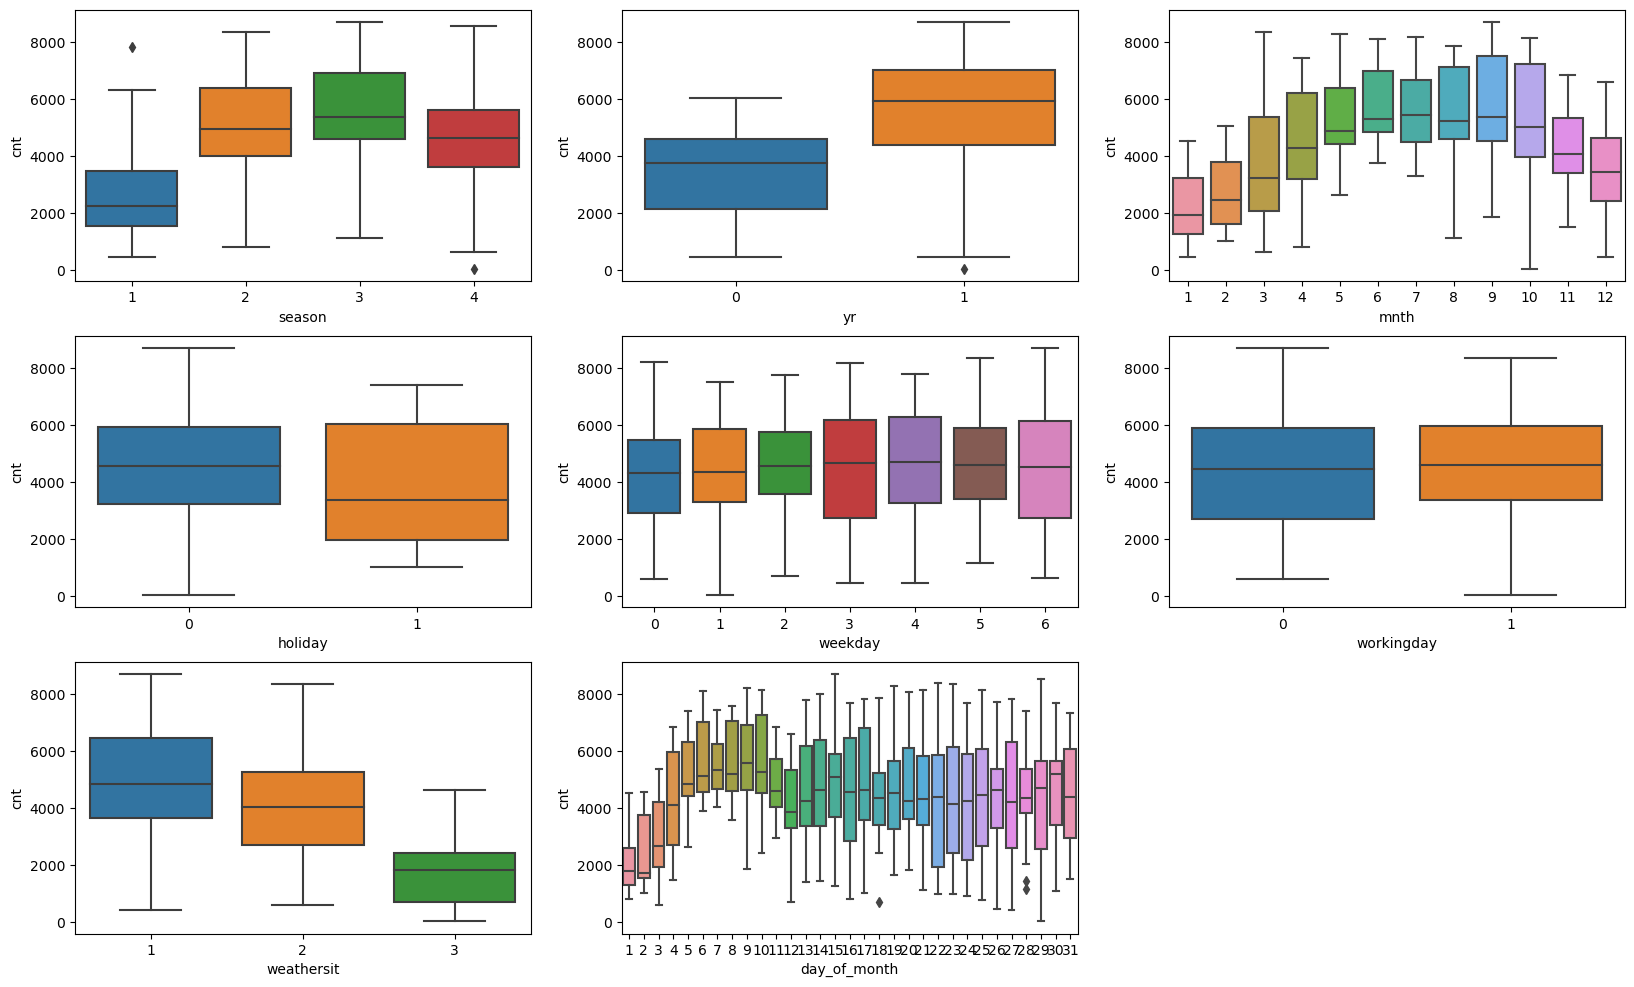

In [17]:
# visualizing categorical variable
plt.figure(figsize=(20,12))

plt.subplot(3,3,1) # To plot many plot in one graph. 2 Rows and 3 Columns. Below is the 1st one
sns.boxplot(x='season',y='cnt',data=df)

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df)

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df)

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df)

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=df)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=df)

plt.subplot(3,3,8)
sns.boxplot(x='day_of_month',y='cnt',data=df)


### Multivariate Analysis

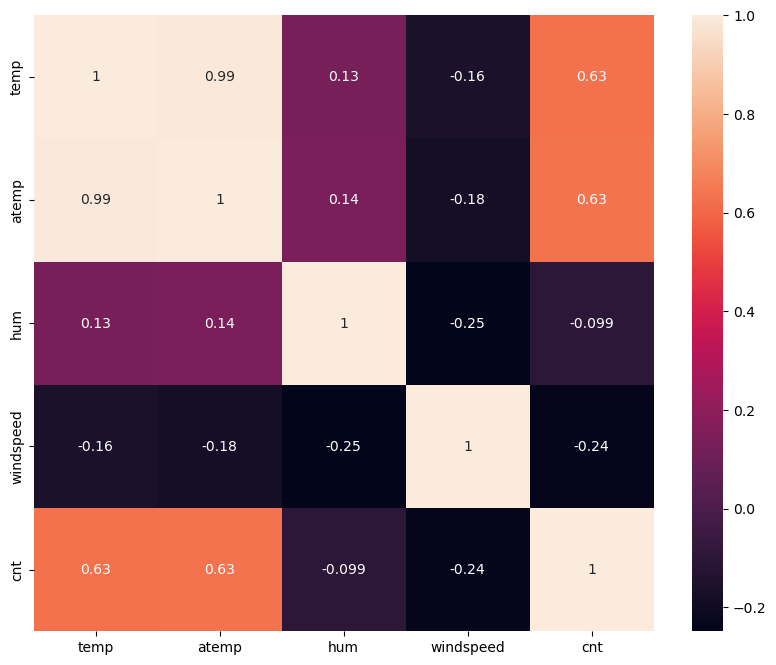

In [18]:
# Plotting heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[cont_col+['cnt']].corr(),annot=True)
plt.show()

### Pre-Processing
    - Dummy variable creation
        - First Decide for which columns dummy variables needs to be created.
        - It cannot be continuous columns.
        - It has to be categorical columns with non-binary values, more that two
    - Scaling
        - Using Standardization

In [19]:
# Getting the unique values
df[cat_col].nunique()

season           4
yr               2
mnth            12
holiday          2
weekday          7
workingday       2
weathersit       3
day_of_month    31
dtype: int64

In [20]:
# Creating the Dummy values
season=pd.get_dummies(df['season'],drop_first=True)
mnth=pd.get_dummies(df['mnth'],drop_first=True)
weekday=pd.get_dummies(df['weekday'],drop_first=True)
weathersit=pd.get_dummies(df['weathersit'],drop_first=True)
day_of_month=pd.get_dummies(df['day_of_month'],drop_first=True)

# Replacing the dummy columns names with their DataDict meaning, to make the dataframe readable
season.columns = ['Summer','Fall','Winter']
mnth.columns = ['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
weekday.columns = ['Mon','Tue','Wed','Thu','Fri','Sat']
weathersit.columns= ['Mist','Snow']

In [21]:
# Concatinating the Parent Dataframe with the newely created Dataframes
df1=pd.concat([df,season,mnth,weekday,weathersit,day_of_month],axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,22,23,24,25,26,27,28,29,30,31
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Dropping the columns for which we have created the dummy variable columns
df1=df1.drop(['season','mnth','weekday','weathersit','day_of_month'],axis=1)

In [23]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,...,22,23,24,25,26,27,28,29,30,31
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df1.shape

(730, 60)

### Splitting the dataset into Train-Test

In [25]:
# First creating the X and y data
X=df1.drop(['cnt'],axis=1)
y=df1['cnt']

In [26]:
print(X.shape)
print(y.shape)

(730, 59)
(730,)


In [27]:
# Coverting the numeric column names to string
X.columns=X.columns.astype(str)

In [44]:
# Splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=100)

In [45]:
print(X_train.shape)
print(y_train.shape)

(511, 59)
(511,)


### Scaling using Standardisation

In [46]:
# STandardizing the X_train/X_test values
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()

In [47]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Summer,Fall,Winter,...,22,23,24,25,26,27,28,29,30,31
count,5.110000e+02,511.000000,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,...,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02
mean,5.388167e-17,0.000000,1.738118e-17,-5.388167e-17,1.955383e-16,-2.294316e-16,-6.604849e-17,6.952473e-18,8.516779e-17,-4.171484e-17,...,-4.171484e-17,-1.042871e-17,-8.690591e-18,3.128613e-17,4.171484e-17,-6.952473e-18,3.650048e-17,-6.952473e-18,-1.564306e-17,2.433366e-17
std,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.016774e+00,-0.161410,-1.446674e+00,-2.381610e+00,-2.418135e+00,-4.462250e+00,-1.891332e+00,-5.715175e-01,-5.956023e-01,-5.745276e-01,...,-2.016271e-01,-1.614104e-01,-1.963220e-01,-1.676720e-01,-1.796106e-01,-1.737318e-01,-1.796106e-01,-1.908919e-01,-1.737318e-01,-1.337655e-01
25%,-1.016774e+00,-0.161410,-1.446674e+00,-8.696820e-01,-8.492974e-01,-7.648886e-01,-7.171991e-01,-5.715175e-01,-5.956023e-01,-5.745276e-01,...,-2.016271e-01,-1.614104e-01,-1.963220e-01,-1.676720e-01,-1.796106e-01,-1.737318e-01,-1.796106e-01,-1.908919e-01,-1.737318e-01,-1.337655e-01
50%,9.815780e-01,-0.161410,6.898880e-01,2.079133e-02,7.618530e-02,2.172507e-02,-1.340854e-01,-5.715175e-01,-5.956023e-01,-5.745276e-01,...,-2.016271e-01,-1.614104e-01,-1.963220e-01,-1.676720e-01,-1.796106e-01,-1.737318e-01,-1.796106e-01,-1.908919e-01,-1.737318e-01,-1.337655e-01
75%,9.815780e-01,-0.161410,6.898880e-01,8.767475e-01,8.262114e-01,7.140587e-01,5.517224e-01,-5.715175e-01,1.675687e+00,-5.745276e-01,...,-2.016271e-01,-1.614104e-01,-1.963220e-01,-1.676720e-01,-1.796106e-01,-1.737318e-01,-1.796106e-01,-1.908919e-01,-1.737318e-01,-1.337655e-01
max,9.815780e-01,6.183262,6.898880e-01,2.050236e+00,2.294357e+00,2.399232e+00,4.003534e+00,1.746304e+00,1.675687e+00,1.737154e+00,...,4.949945e+00,6.183262e+00,5.083706e+00,5.952355e+00,5.556704e+00,5.744733e+00,5.556704e+00,5.228316e+00,5.744733e+00,7.461141e+00


### Feature Selection

In [48]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=10)

selector=selector.fit(X_train,y_train)
list(zip(X_train.columns,selector.support_,selector.ranking_))

[('yr', True, 1),
 ('holiday', False, 19),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 24),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Summer', True, 1),
 ('Fall', False, 4),
 ('Winter', True, 1),
 ('Feb', False, 23),
 ('Mar', False, 7),
 ('Apr', False, 10),
 ('May', False, 8),
 ('Jun', False, 9),
 ('Jul', False, 20),
 ('Aug', False, 3),
 ('Sep', True, 1),
 ('Oct', False, 5),
 ('Nov', False, 22),
 ('Dec', False, 21),
 ('Mon', False, 42),
 ('Tue', False, 37),
 ('Wed', False, 33),
 ('Thu', False, 36),
 ('Fri', False, 32),
 ('Sat', False, 2),
 ('Mist', True, 1),
 ('Snow', True, 1),
 ('2', False, 38),
 ('3', False, 14),
 ('4', False, 18),
 ('5', False, 40),
 ('6', False, 43),
 ('7', False, 16),
 ('8', False, 47),
 ('9', False, 6),
 ('10', False, 30),
 ('11', False, 11),
 ('12', False, 26),
 ('13', False, 45),
 ('14', False, 44),
 ('15', False, 35),
 ('16', False, 28),
 ('17', False, 25),
 ('18', False, 50),
 ('19', False, 41),
 ('20', False, 29),
 ('21', False, 34),

In [49]:
X_train.columns[selector.support_]

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'Summer', 'Winter',
       'Sep', 'Mist', 'Snow'],
      dtype='object')

In [50]:
X_train_selected=X_train.columns[selector.support_]
X_test_selected=X_test.columns[selector.support_]

In [51]:
X_train=X_train[X_train_selected]
X_test=X_test[X_test_selected]

### Model Creation
    - Adding a constant
    - Creating models

In [52]:
X_train_sm=sm.add_constant(X_train)

#### First Model

In [53]:
ls_model_01=sm.OLS(y_train,X_train_sm).fit()
ls_model_01.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.3
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          1.58e-188
Time:                        11:22:09   Log-Likelihood:                -4136.0
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     500   BIC:                             8341.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     35.436    126.744      0.000    4421.682    4560.925
yr           996.3916     35.968     27.702      0.000     925.724    1067.059
workingday    95.5334     35.710      2.675      0.008      25.373     165.694
temp        1124.5479     39.972     28.134      0.000    1046.015    1203.081
hum         -223.4312     48.341     -4.622      0.000    -318.407    -128.456
windspeed   -274.5594     38.548     -7.122      0.000    -350.296    -198.823
Summer       342.0299     38.732      8.831      0.000     265.932     418.128
Winter       527.6650     39.731     13.281      0.000     449.606     605.724
Sep          243.9040     37.396      6.522      0.000     170.432     317.376
Mist        -207.2355     44.109     -4.698      0.000    -293.898    -120.573
Snow        -343.9191     39.374     -8.735      0.000    -421.278    -266.560
==============================================================================
Omnibus:                       62.599   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.229
Skew:                          -0.632   Prob(JB):                     1.96e-34
Kurtosis:                       5.386   Cond. No.                         2.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Above P-value Stats Looks good, now checking the VIF Stats too
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.028248
2,workingday,1.013557
3,temp,1.269893
4,hum,1.857308
5,windspeed,1.181068
6,Summer,1.192358
7,Winter,1.254615
8,Sep,1.111478
9,Mist,1.546407


#### Validating the Model for Test Data
    - Make sure scaling is done for Test Data
    - Test data columns as relected as per RFE output
    - Drop the same columns in Test Data that we dropped for Train data
    - Test the model by evaluating r2_score

In [56]:
# Adding constant
X_test_sm=sm.add_constant(X_test)

In [57]:
X_test_sm.head()

,const,yr,workingday,temp,hum,windspeed,Summer,Winter,Sep,Mist,Snow
184,1.0,-0.957521,-1.519078,1.167500,0.126573,-1.432543,-0.598835,-0.549714,-0.307516,1.455628,-0.167453
535,1.0,1.039594,0.655288,1.465195,-0.190471,-0.997967,1.662284,-0.549714,-0.307516,-0.683852,-0.167453
299,1.0,-0.957521,0.655288,-0.201017,1.337087,0.130393,-0.598835,1.810822,-0.307516,1.455628,-0.167453
221,1.0,-0.957521,0.655288,1.380775,-1.351984,0.163928,-0.598835,-0.549714,-0.307516,-0.683852,-0.167453
152,1.0,-0.957521,0.655288,1.105293,-2.176289,1.400862,1.662284,-0.549714,-0.307516,-0.683852,-0.167453


In [58]:
# Predicting the target variable using the model created by Train data
y_test_pred=ls_model_01.predict(X_test_sm)

In [59]:
# Evaluating the R2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8001975153812249

In [60]:
# r2 score for test data is also close to train r2 (<5% margin)
# Above VIF Stats also looks good, no value is greater than 5
# The Prob(F-Statistic) is also very small , so we are good

##### Residual Analysis

<Axes: title={'center': 'Error Distribution'}, ylabel='Density'>

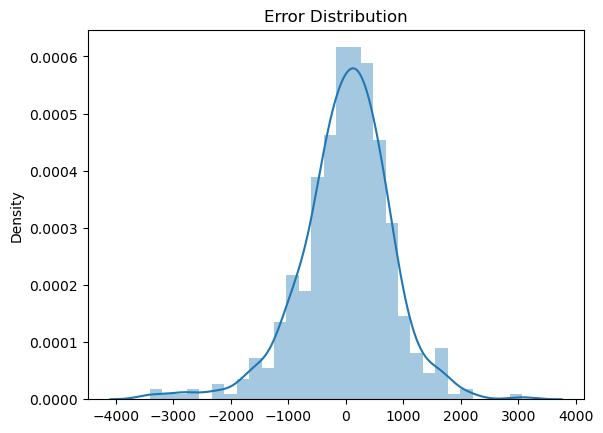

In [61]:
y_train_pred=ls_model_01.predict(X_train_sm)
res=y_train-y_train_pred
plt.title("Error Distribution")
sns.distplot(res)


##### Subjective Questions Work

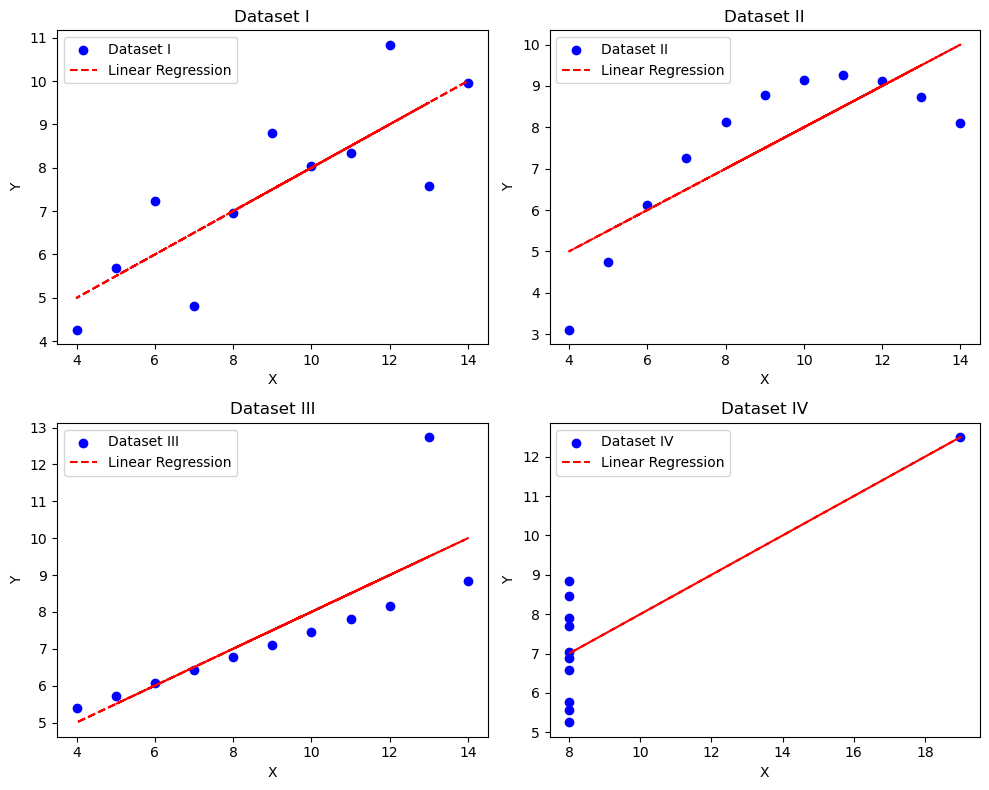

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Anscombe's quartet data
data = {
    'I': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], 'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]},
    'II': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], 'y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]},
    'III': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], 'y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]},
    'IV': {'x': [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8], 'y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]}
}

# Create subplots for each dataset
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot each dataset
for ax, (label, values) in zip(axs.flatten(), data.items()):
    x = np.array(values['x'])
    y = np.array(values['y'])

    # Scatter plot
    ax.scatter(x, y, label=f'Dataset {label}', color='blue')

    # Linear regression line
    slope, intercept, _, _, _ = linregress(x, y)
    line = slope * x + intercept
    ax.plot(x, line, color='red', linestyle='--', label='Linear Regression')

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Dataset {label}')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Text(0.5, 1.0, 'Fitted vs Residual')

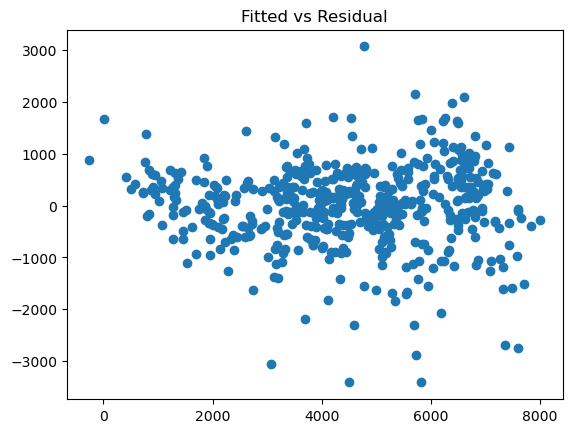

In [62]:
# Verifying Homoscedasticity
plt.scatter(x=y_train_pred,y=res)
plt.title('Fitted vs Residual')

In [63]:
# Verifying Independence of Residuals
residuals = ls_model_01.resid

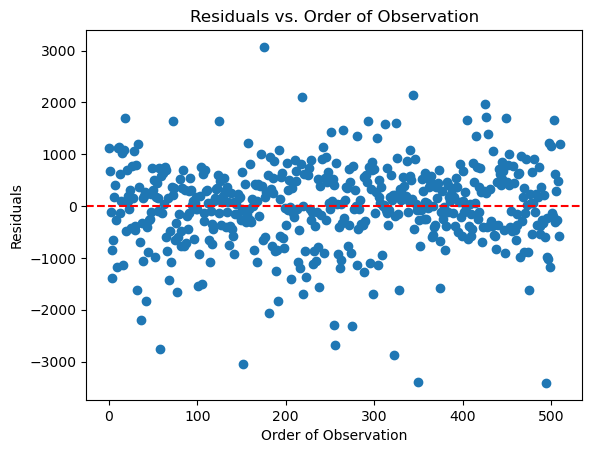

In [64]:
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Order of Observation')
plt.xlabel('Order of Observation')
plt.ylabel('Residuals')
plt.show()